## **1.0 Business Understanding**
### **1.1 Business Introduction**
GlobalTech E-Commerce is a rapidly growing online retail company that sells consumer electronics, home appliances, and tech accessories across Europe. Founded in 2015, the company has expanded to serve over 500,000 customers with an annual revenue of €85 million. Despite strong growth, GlobalTech faces increasing competition from Amazon and other major players in the European e-commerce market. The company currently employs a one-size-fits-all marketing approach, sending the same promotional emails and advertisements to all customers regardless of their purchasing behavior, preferences, or value to the business. This generic strategy has led to declining email open rates, increasing customer acquisition costs, and missed opportunities for cross-selling and customer retention.

### **1.2 Problem Statement**
GlobalTech is experiencing three critical business challenges: First, marketing efficiency has deteriorated with campaign response rates dropping by 35% over the past 18 months, leading to wasted advertising spend and lower ROI. Second, customer churn is increasing, particularly among high-value segments, with a 22% reduction in repeat purchase rates from premium customers. Third, the company lacks understanding of distinct customer behaviors and preferences, resulting in irrelevant product recommendations and missed cross-selling opportunities worth an estimated €12 million annually. The current blanket marketing approach fails to recognize that different customer segments have unique needs, purchasing patterns, and responsiveness to various marketing channels.

### **1.3 Stakeholders Questions**
Marketing Director: "How can we improve campaign targeting to increase conversion rates while reducing customer acquisition costs?"
CEO: "Which customer segments drive the most lifetime value and how can we better retain our high-value customers?"
Product Manager: "What products are frequently purchased together and how can we optimize our recommendation engine?"
Customer Service Manager: "Can we identify at-risk customers before they churn to proactively address their concerns?"
CFO: "What is the ROI of implementing a customer segmentation strategy and how will it impact our bottom line?"

### **1.4 Project Objectives**
> * Customer Segmentation: Identify distinct customer segments based on purchasing behavior, demographics, and engagement patterns to enable targeted marketing strategies.
> * Lifetime Value Prediction: Develop a model to classify customers into high, medium, and low-value segments for prioritized retention efforts.
> * Association Rule Mining: Discover product affinity patterns to optimize cross-selling recommendations and inventory placement.
> * Churn Risk Identification: Create an early warning system to flag customers showing signs of decreased engagement or potential churn.
> * Marketing Personalization: Build a framework for segment-specific marketing campaigns, communication channels, and promotional offers.
> * Dashboard Development: Deliver an interactive web dashboard that allows business users to explore segments, run customer lookups, and track segment performance metrics.

Success Metrics: 25% improvement in marketing campaign conversion rates, 15% reduction in customer churn, 20% increase in customer lifetime value, and €8 million in additional annual revenue through better cross-selling within 12 months of implementation.



## **2.0 Data Understanding**

### **2.1 Data Source**
The dataset for this project was sourced from the UCI Machine Learning Repository. It contains transactional data from a UK-based online retail store specializing in unique all-occasion gifts. This data will be used for customer segmentation, behavior analysis, and product association mining to drive targeted marketing strategies.
>> [downloaded Dataset](https://archive.ics.uci.edu/dataset/502/online+retail+ii)

### **2.2 Data Description**
The dataset contains all transactions occurring between December 2009 and December 2011. Each row represents one product line in a transaction, with details about the product, quantity, price, customer, and transaction timestamp.

| Column Name                 |                                                    Description                                                         |
|-----------------------------|------------------------------------------------------------------------------------------------------------------------|
| InvoiceNo               	  | A 6-digit integral number uniquely assigned to each transaction. If this code starts with the letter 'c', it indicates a cancellation.|
| StockCode                   | Product item code. A 5-digit integral number uniquely assigned to each distinct product.|
| Description                 | Product item name.|
| Quantity                    | The quantities of each product (item) per transaction. (negative values indicate returns).|
| InvoiceDate                 | The day and time when a transaction was generated.|
| UnitPrice                   | Product price per unit in sterling (£)|
| CustomerID                  | A 5-digit integral number uniquely assigned to each customer.|
| Country                     | Name of country where customer resides|

## **3.0 Data Preparation**

In [3]:
# Importing libraries
# Data Manipulation
import pandas as pd
import numpy as np

# Data Visualizatiion
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Statistical analysis
from sklearn.preprocessing import StandardScaler

# modelling
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# display setting
pd.options.display.float_format = '{:20.2f}'.format
pd.set_option('display.max_columns', 999)
# filter feature warnings
import warnings
warnings.filterwarnings("ignore")


### **3.1 Data Overview**

In [4]:
data = pd.read_excel(r"C:\Users\PC\Documents\After  School\Project\Project Main Box\Customer-Segmentation\data\online_retail_II.xlsx", sheet_name=0)
data.iloc[1230:1240]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1230,489557,22353,LUNCHBOX WITH CUTLERY FAIRY CAKES,6,2009-12-01 12:52:00,2.55,12490.00,France
1231,489557,20685,RED SPOTTY COIR DOORMAT,2,2009-12-01 12:52:00,6.75,12490.00,France
1232,489557,21210,SET OF 72 RETRO SPOT PAPER DOILIES,12,2009-12-01 12:52:00,1.45,12490.00,France
1233,489557,21212,PACK OF 72 RETRO SPOT CAKE CASES,24,2009-12-01 12:52:00,0.55,12490.00,France
1234,489557,21238,RED SPOTTY CUP,16,2009-12-01 12:52:00,0.85,12490.00,France
1235,489557,85099B,JUMBO BAG RED WHITE SPOTTY,20,2009-12-01 12:52:00,1.95,12490.00,France
1236,489557,20719,WOODLAND CHARLOTTE BAG,10,2009-12-01 12:52:00,0.85,12490.00,France
1237,489557,21039,RED SPOTTY SHOPPING BAG,12,2009-12-01 12:52:00,2.55,12490.00,France
1238,489557,20712,JUMBO BAG WOODLAND ANIMALS,10,2009-12-01 12:52:00,1.95,12490.00,France
1239,489557,20711,JUMBO BAG TOYS,10,2009-12-01 12:52:00,1.95,12490.00,France


In [5]:
# check the shape of the data
print(f"The dataset contains {data.shape[0]} rows and {data.shape[1]} columns")

The dataset contains 525461 rows and 8 columns


In [6]:
# check more information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [7]:
# numerical columns
display(data.describe())
# non numerical columns
display(data.describe(include='O'))

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


### **3.2 Exploratory Data Analysis**

#### **3.2.1 Data Inspection**

In [8]:
# handle missing values
print(f"This dataset contains a total of {data.isnull().sum().sum()} missing values")
print("below is the distribution of missing values per column")
data.isna().sum()

This dataset contains a total of 110855 missing values
below is the distribution of missing values per column


Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [9]:
# review the missing data
data[data['Customer ID'].isna()].head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom


In [10]:
# view the negative quantities
data[data['Quantity']<0].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia


> Inspect Invoice column

In [11]:
"""
According to the data documentation, valid invoice numbers should consist of 6-digit numerical strings
However, if an invoice number starts with the letter 'C', it indicates a canceled transaction. We will 
conduct a quality check to identify entries that do not follow the standard 6-digit number format and entries
that contain the letter 'C' or any other characters that do not follow the correct procedure.
"""
# convert invoice from object to string
data['Invoice'] = data['Invoice'].astype('str')
# filter where invoice does not meet the standard procedure
data[data['Invoice'].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


In [12]:
# shows all unique non-digit characters
data['Invoice'].str.replace("[0-9]", "", regex=True).unique()

array(['', 'C', 'A'], dtype=object)

In [13]:
# preview invoices that start with A
data[data["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


> Inspect StockCode column

In [14]:
# convert stockcode from object to string
data['StockCode'] = data['StockCode'].astype('str')
"""
According to the data documentation, valid stock codes must consist of either a five-digit 
numerical string or a five-digit number followed by one or more alphabetic characters to 
denote product variations. We will conduct a quality check to identify entries that do not 
conform to either of these two prescribed formats.
"""
# filter where stockcode does not meet the standard procedure
data[(data['StockCode'].str.match("^\\d{5}$")==False) & (data['StockCode'].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

> Examine all the unique codes in stockcode represents to identify if they are worth analysis or we can exclude them

In [15]:
data[data["StockCode"].str.contains("^POST")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium


In [16]:
data[data["StockCode"].str.contains("^D")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
735,C489535,D,Discount,-1,2009-12-01 12:11:00,9.00,15299.00,United Kingdom
736,C489535,D,Discount,-1,2009-12-01 12:11:00,19.00,15299.00,United Kingdom
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom


In [17]:
data[data["StockCode"].str.contains("^DCGS0068")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2378,489597,DCGS0068,DOGS NIGHT COLLAR,1,2009-12-01 14:28:00,8.65,NaN,United Kingdom
62734,494918,DCGS0068,DOGS NIGHT COLLAR,1,2010-01-19 17:49:00,8.47,NaN,United Kingdom


In [18]:
data[data["StockCode"].str.contains("^DOT")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2379,489597,DOT,DOTCOM POSTAGE,1,2009-12-01 14:28:00,647.19,NaN,United Kingdom
2539,489600,DOT,DOTCOM POSTAGE,1,2009-12-01 14:43:00,55.96,NaN,United Kingdom
2551,489601,DOT,DOTCOM POSTAGE,1,2009-12-01 14:44:00,68.39,NaN,United Kingdom


In [19]:
data[data["StockCode"].str.contains("^M")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2697,489609,M,Manual,1,2009-12-01 14:50:00,4.00,NaN,United Kingdom
3053,C489651,M,Manual,-1,2009-12-01 16:48:00,5.10,17804.00,United Kingdom
5897,C489859,M,Manual,-1,2009-12-02 14:45:00,69.57,NaN,United Kingdom


In [20]:
data[data["StockCode"].str.contains("^DCGS0004")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8371,490074,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2009-12-03 14:39:00,17.35,NaN,United Kingdom
98951,498699,DCGS0004,NaN,-2,2010-02-22 12:32:00,0.00,NaN,United Kingdom
164723,504935,DCGS0004,HAYNES CAMPER SHOULDER BAG,1,2010-04-19 11:19:00,16.98,NaN,United Kingdom


In [21]:
data[data["StockCode"].str.contains("^DCGS0076")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
8373,490074,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-03 14:39:00,16.48,NaN,United Kingdom
16426,490741,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 17:56:00,16.48,NaN,United Kingdom
17265,490745,DCGS0076,SUNJAR LED NIGHT NIGHT LIGHT,1,2009-12-07 18:02:00,16.48,NaN,United Kingdom


In [22]:
data[data["StockCode"].str.contains("^C2")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
9292,490127,C2,CARRIAGE,1,2009-12-03 18:13:00,50.00,14156.00,EIRE
14481,490541,C2,CARRIAGE,1,2009-12-07 09:25:00,50.00,NaN,EIRE
14502,490542,C2,CARRIAGE,1,2009-12-07 09:42:00,50.00,14911.00,EIRE


In [23]:
data[data["StockCode"].str.contains("^BANK CHARGES")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom


In [24]:
data[data["StockCode"].str.contains("^DCGS0003")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
20249,491041,DCGS0003,BOXED GLASS ASHTRAY,1,2009-12-09 09:42:00,2.57,NaN,United Kingdom
232222,511858,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-11 10:05:00,2.51,NaN,United Kingdom
238355,512437,DCGS0003,BOXED GLASS ASHTRAY,1,2010-06-15 16:17:00,2.51,NaN,United Kingdom


In [25]:
data[data["StockCode"].str.contains("^TEST001")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
27994,491725,TEST001,This is a test product.,10,2009-12-14 08:34:00,4.50,12346.00,United Kingdom
28251,491742,TEST001,This is a test product.,5,2009-12-14 11:00:00,4.50,12346.00,United Kingdom
28254,491744,TEST001,This is a test product.,5,2009-12-14 11:02:00,4.50,12346.00,United Kingdom


In [26]:
data[data["StockCode"].str.contains("^gift_0001_10")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
40904,492782,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2009-12-18 17:06:00,8.69,NaN,United Kingdom
125922,501441,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-16 13:44:00,8.51,NaN,United Kingdom
136604,502486,gift_0001_10,Dotcomgiftshop Gift Voucher £10.00,1,2010-03-24 17:43:00,8.51,NaN,United Kingdom


In [27]:
data[data["StockCode"].str.contains("^gift_0001_50")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
41263,492783,gift_0001_50,Dotcomgiftshop Gift Voucher £50.00,1,2009-12-18 17:15:00,43.48,NaN,United Kingdom
75136,496249,gift_0001_50,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298841,518491,gift_0001_50,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [28]:
data[data["StockCode"].str.contains("^DCGS0066N")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
44245,493265,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:05:00,8.65,NaN,United Kingdom
44335,493268,DCGS0066N,NaN,1,2009-12-22 15:07:00,0.00,NaN,United Kingdom
44377,493269,DCGS0066N,NAVY CUDDLES DOG HOODIE,1,2009-12-22 15:07:00,8.65,NaN,United Kingdom


In [29]:
data[data["StockCode"].str.contains("^gift_0001_30")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
45212,493404,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2009-12-23 15:30:00,26.08,NaN,United Kingdom
54564,494380,gift_0001_30,NaN,5,2010-01-13 17:39:00,0.00,NaN,United Kingdom
54636,494381,gift_0001_30,Dotcomgiftshop Gift Voucher £30.00,1,2010-01-13 17:44:00,25.53,NaN,United Kingdom


In [30]:
data[data["StockCode"].str.contains("^PADS")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
62299,494914,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-19 17:04:00,0.00,16705.00,United Kingdom
74731,496222,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-01-29 13:53:00,0.00,13583.00,United Kingdom
77702,496473,PADS,PADS TO MATCH ALL CUSHIONS,1,2010-02-01 15:38:00,0.00,17350.00,United Kingdom


In [31]:
data[data["StockCode"].str.contains("^ADJUST")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
70975,495732,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:20:00,96.46,NaN,EIRE
70976,495733,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:21:00,68.34,14911.00,EIRE
70977,495735,ADJUST,Adjustment by john on 26/01/2010 16,1,2010-01-26 16:22:00,201.56,12745.00,EIRE


In [32]:
data[data["StockCode"].str.contains("^gift_0001_40")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75137,496248,gift_0001_40,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298847,518492,gift_0001_40,NaN,10,2010-08-09 12:30:00,0.00,NaN,United Kingdom
299652,518579,gift_0001_40,Dotcomgiftshop Gift Voucher £40.00,1,2010-08-10 12:08:00,31.35,NaN,United Kingdom


In [33]:
data[data["StockCode"].str.contains("^gift_0001_60")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75138,496250,gift_0001_60,NaN,3,2010-01-29 16:17:00,0.00,NaN,United Kingdom
298843,518490,gift_0001_60,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [34]:
data[data["StockCode"].str.contains("^gift_0001_70")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75139,496251,gift_0001_70,NaN,2,2010-01-29 16:17:00,0.00,NaN,United Kingdom
235291,512168,gift_0001_70,Dotcomgiftshop Gift Voucher £70.00,1,2010-06-14 11:24:00,59.57,NaN,United Kingdom
298840,518489,gift_0001_70,NaN,10,2010-08-09 12:29:00,0.00,NaN,United Kingdom


In [35]:
data[data["StockCode"].str.contains("^gift_0001_90")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
75141,496252,gift_0001_90,NaN,2,2010-01-29 16:18:00,0.00,NaN,United Kingdom
298839,518487,gift_0001_90,NaN,10,2010-08-09 12:28:00,0.00,NaN,United Kingdom


In [36]:
data[data["StockCode"].str.contains("^DCGSSGIRL")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80231,496722,DCGSSGIRL,NaN,-1,2010-02-03 14:04:00,0.00,NaN,United Kingdom
241372,512738,DCGSSGIRL,update,100,2010-06-17 14:11:00,0.00,NaN,United Kingdom
244831,513099,DCGSSGIRL,GIRLS PARTY BAG,3,2010-06-21 15:13:00,3.36,NaN,United Kingdom


In [37]:
data[data["StockCode"].str.contains("^DCGS0006")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80337,496740,DCGS0006,NaN,-1,2010-02-03 14:28:00,0.00,NaN,United Kingdom


In [38]:
data[data["StockCode"].str.contains("^DCGS0016")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80338,496741,DCGS0016,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


In [39]:
data[data["StockCode"].str.contains("^DCGS0027")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80339,496742,DCGS0027,NaN,-1,2010-02-03 14:29:00,0.00,NaN,United Kingdom


In [40]:
data[data["StockCode"].str.contains("^DCGS0036")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80342,496744,DCGS0036,NaN,-1,2010-02-03 14:35:00,0.00,NaN,United Kingdom


In [41]:
data[data["StockCode"].str.contains("^DCGS0039")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80361,496746,DCGS0039,NaN,-1,2010-02-03 14:36:00,0.00,NaN,United Kingdom


In [42]:
data[data["StockCode"].str.contains("^DCGS0060")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
80953,496814,DCGS0060,NaN,-3,2010-02-04 09:46:00,0.00,NaN,United Kingdom


In [43]:
data[data["StockCode"].str.contains("^DCGS0056")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
81143,496855,DCGS0056,NaN,-4,2010-02-04 11:46:00,0.00,NaN,United Kingdom


In [44]:
data[data["StockCode"].str.contains("^DCGS0059")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
82846,496988,DCGS0059,NaN,-8,2010-02-05 11:21:00,0.00,NaN,United Kingdom


In [45]:
data[data["StockCode"].str.contains("^GIFT")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
83304,497107,GIFT,NaN,-9,2010-02-05 15:18:00,0.00,NaN,United Kingdom


In [46]:
data[data["StockCode"].str.contains("^m")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
96608,498492,m,Manual,1,2010-02-19 10:56:00,2.55,NaN,United Kingdom
96609,498492,m,Manual,1,2010-02-19 10:56:00,3.40,NaN,United Kingdom
157226,504396,m,Manual,1,2010-04-13 11:45:00,4.00,NaN,United Kingdom


In [47]:
data[data["StockCode"].str.contains("^DCGSLBOY")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89000,497811,DCGSLBOY,NaN,-16,2010-02-12 14:45:00,0.00,NaN,United Kingdom


In [48]:
data[data["StockCode"].str.contains("^DCGS005")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2377,489597,DCGS0058,MISO PRETTY GUM,1,2009-12-01 14:28:00,0.83,NaN,United Kingdom
8372,490074,DCGS0058,MISO PRETTY GUM,1,2009-12-03 14:39:00,0.83,NaN,United Kingdom
17264,490745,DCGS0058,MISO PRETTY GUM,1,2009-12-07 18:02:00,0.83,NaN,United Kingdom


In [49]:
data[data["StockCode"].str.contains("^DCGS0062")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98952,498700,DCGS0062,NaN,-1,2010-02-22 12:34:00,0.00,NaN,United Kingdom
414064,528952,DCGS0062,ROAD-RAGE CAR FRESHENER,1,2010-10-25 16:57:00,2.51,NaN,United Kingdom


In [50]:
data[data["StockCode"].str.contains("^DCGS0037")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
98953,498701,DCGS0037,NaN,-1,2010-02-22 12:35:00,0.00,NaN,United Kingdom
236545,512289,DCGS0037,KEY-RING CORKSCREW,1,2010-06-14 14:49:00,12.72,NaN,United Kingdom


In [51]:
data[data["StockCode"].str.contains("^DCGSSBOY")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
101692,499040,DCGSSBOY,NaN,-90,2010-02-24 13:16:00,0.00,NaN,United Kingdom
241371,512737,DCGSSBOY,update,100,2010-06-17 14:10:00,0.00,NaN,United Kingdom
244830,513099,DCGSSBOY,BOYS PARTY BAG,5,2010-06-21 15:13:00,3.36,NaN,United Kingdom


In [52]:
data[data["StockCode"].str.contains("^DCGSLGIRL")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
101693,499042,DCGSLGIRL,NaN,-57,2010-02-24 13:31:00,0.00,NaN,United Kingdom


In [53]:
data[data["StockCode"].str.contains("^S")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
114061,C500305,S,SAMPLES,-1,2010-03-07 10:59:00,73.80,NaN,United Kingdom
114083,C500309,S,SAMPLES,-1,2010-03-07 11:09:00,32.03,NaN,United Kingdom
133558,C502083,S,SAMPLES,-1,2010-03-22 15:50:00,170.37,NaN,United Kingdom


In [54]:
data[data["StockCode"].str.contains("^DCGS0069")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
123592,501161,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-03-15 09:28:00,16.13,NaN,United Kingdom
148841,503549,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-01 15:04:00,16.13,NaN,United Kingdom
151515,503823,DCGS0069,OOH LA LA DOGS COLLAR,1,2010-04-07 14:59:00,16.13,NaN,United Kingdom


In [55]:
data[data["StockCode"].str.contains("^DCGS0070")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148842,503549,DCGS0070,CAMOUFLAGE DOG COLLAR,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [56]:
data[data["StockCode"].str.contains("^DCGS0075")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
148843,503549,DCGS0075,CAMOUFLAGUE DOG LEAD,1,2010-04-01 15:04:00,12.72,NaN,United Kingdom


In [57]:
data[data["StockCode"].str.contains("^B")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
18410,C490943,BANK CHARGES,Bank Charges,-1,2009-12-08 14:08:00,15.00,16703.00,United Kingdom
18466,490948,BANK CHARGES,Bank Charges,1,2009-12-08 14:29:00,15.00,16805.00,United Kingdom
33435,C492206,BANK CHARGES,Bank Charges,-1,2009-12-15 16:32:00,848.43,NaN,United Kingdom


In [58]:
data[data["StockCode"].str.contains("^DCGS0041")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
222345,511021,DCGS0041,HAYNES MINI-COOPER PLAYING CARDS,1,2010-06-04 16:13:00,5.06,NaN,United Kingdom


In [59]:
data[data["StockCode"].str.contains("^ADJUST2")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
249672,513564,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,300.13,17050.00,United Kingdom
249673,513566,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,358.47,17364.00,United Kingdom
249674,513565,ADJUST2,Adjustment by Peter on Jun 25 2010,1,2010-06-25 14:15:00,72.45,16422.00,United Kingdom


In [60]:
data[data["StockCode"].str.contains("^47503J")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
2981,489642,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-01 16:19:00,7.95,NaN,United Kingdom
9784,490149,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-04 09:43:00,16.48,NaN,United Kingdom
15894,490711,47503J,SET/3 FLORAL GARDEN TOOLS IN BAG,1,2009-12-07 15:26:00,7.95,17841.00,United Kingdom


In [61]:
data[data["StockCode"].str.contains("^SP1002")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
377066,525772,SP1002,KID'S CHALKBOARD/EASEL,1,2010-10-07 11:12:00,2.95,12748.00,United Kingdom
377387,525837,SP1002,KID'S CHALKBOARD/EASEL,4,2010-10-07 12:23:00,2.95,17841.00,United Kingdom
426694,530135,SP1002,NaN,-27,2010-11-01 15:33:00,0.00,NaN,United Kingdom


In [62]:
data[data["StockCode"].str.contains("^C3")].head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
302041,518785,C3,NaN,-4999,2010-08-11 16:55:00,0.00,NaN,United Kingdom


In [63]:
data[data["StockCode"].str.contains("^AMAZONFEE")].head(3)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
440688,C531400,AMAZONFEE,AMAZON FEE,-1,2010-11-08 10:08:00,6706.71,NaN,United Kingdom
440698,531411,AMAZONFEE,AMAZON FEE,1,2010-11-08 10:11:00,6706.71,NaN,United Kingdom
517452,C537600,AMAZONFEE,AMAZON FEE,-1,2010-12-07 12:41:00,1.00,NaN,United Kingdom


> The analyisis in the stockcode shows that the unique values that were identified were not valid salable products in the market, this were products that were sold/given as operational or transactional codes, including market test samples, promotional gifts, manual adjustments, and potential computer system errors.As these items do not reflect genuine customer purchasing behavior for regular products, they will be excluded from the current analysis to ensure the integrity of the customer segmentation and purchasing pattern analysis.

#### **3.2.2 Data Cleaning Plan**

***if Any***
> * Drop Irrelevant Columns like Remove IDs, unnamed columns, or anything not useful for analysis.
> * Fix Data Types that is, ensure each column has the appropriate data type (e.g. int, float, category, datetime).
> * Handling Missing Data Fill or drop missing values based on relevance.
> * Removing Duplicates if any exist.
> * Detect and remove extreme values that could distort analysis that is remove outliers
> * Clean and standardize text data Fix inconsistent labels (e.g., "Male" vs "male"), rename columns clearly, and remove extra spaces or typos.
> * Perform Univariate Analysis i.e Understand the distribution of individual features (one at a time).
> * Bivariate Analysis that is Explore relationships between two variables.
> * Multivariate Analysis (if needed) Use heatmaps, pairplots, or pivot tables to analyze interactions among 3+ variables.
> * Feature Insights that is Summarize the most useful features for modeling, and drop or flag irrelevant ones.

NB: for the missing values this is the criteria that will be used:
> * If a column has 0% missing values, no cleaning is needed.
> * If a column has less than 5% missing values, you can either drop the missing rows or fill them using mean/median/mode.
> * If a column has more than 50% missing values, it may be better to drop the column entirely.

In [64]:
# copy the dta
cleaned_data = data.copy()

In [65]:
# clean the errors in invoice i.e 'c' and 'a'
# convert into strings
cleaned_data["Invoice"] = cleaned_data["Invoice"].astype('str')
# define the pattern to follow
mask = (
    cleaned_data["Invoice"].str.match("^\\d{6}$")==True
)
# filter and keep rows where invoice is 6 digits
cleaned_data = cleaned_data[mask]
# preview
cleaned_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [66]:
# cleaning the stockcode
#conver to str
cleaned_data["StockCode"] = cleaned_data["StockCode"].astype('str')
# define the pattern to follow
mask = (
    (cleaned_data["StockCode"].str.match("^\\d{5}$")==True)
    | (cleaned_data["StockCode"].str.match("^\\d{5}[a-zA-z]+$")==True)
)
# filter and keep rows where stockcode is 5 digits and it can contain a letter
cleaned_data = cleaned_data[mask]
# preview
cleaned_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [67]:
print(f"Customer ID has a total of {cleaned_data['Customer ID'].isnull().sum()} missing values")

Customer ID has a total of 106459 missing values


In [68]:
# drop nan values in columnid
cleaned_data.dropna(subset=['Customer ID'], inplace=True)
# preview
print(f"The customer Id have a total number of {cleaned_data['Customer ID'].isna().sum()} missing values")

The customer Id have a total number of 0 missing values


In [69]:
# preview the data
cleaned_data.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406323.00,406323,406323.00,406323.00
mean,13.62,2010-07-01 10:14:46.649094656,2.99,15373.66
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


In [70]:
# Deal with the price 0.00
print(len(cleaned_data[cleaned_data['Price']==0]))
""" 
This indicates transactions where items were either given as complimentary gifts, 
free samples, promotional items, or involved pricing errors. Since these 28 records 
represent non-revenue transactions that do not reflect typical purchasing behavior, 
they will be excluded from the analysis to maintain focus on genuine customer 
purchasing patterns for segmentation modeling.
"""
cleaned_data = cleaned_data[cleaned_data['Price'] > 0]
#preview
cleaned_data.describe()

28


,Quantity,InvoiceDate,Price,Customer ID
count,406295.00,406295,406295.00,406295.00
mean,13.62,2010-07-01 10:18:05.997415424,2.99,15373.75
min,1.00,2009-12-01 07:45:00,0.03,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14006.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.33


In [71]:
#percentage of remaing data after cleaning
remained_data = len(cleaned_data)/len(data)*100
format_perc = f"{remained_data:.2f}%"
print(f"After performing data cleaning procedures, we have retained a subset of the original dataset for analysis of {format_perc} on the overall data volume.")

After performing data cleaning procedures, we have retained a subset of the original dataset for analysis of 77.32% on the overall data volume.


#### **3.2.3 Feature Engineering**

To enable effective customer segmentation, we engineered a set of features that capture key dimensions of purchasing behavior. The features were constructed at the customer level by aggregating transactional data, with the goal of creating distinct behavioral profiles for clustering analysis. This enginered features include:

> * **Recency** - Days since the customer's last purchase where lower values indicate more recent purchase activity
> * **Frequency** - Total number of distinct transactions made by the customer
> * **Monetary Value** - Total revenue generated by the customer across all purchases

In [72]:
# get the total amount spend on a particular transaction line
cleaned_data['TotalSales'] = cleaned_data['Quantity']*cleaned_data['Price']
# preview
cleaned_data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalSales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


> using customer ID to get the aggregate value for frequency, monetary value and recency

In [73]:
# groupig data by customer to determine the monetary spending, frequenc and recency per customer
aggregated_data = cleaned_data.groupby(by='Customer ID', as_index=False) \
    .agg(
        MonetaryValue=("TotalSales", "sum"),
        Frequency = ("Invoice", "nunique"),
        LastInvoiceDate = ("InvoiceDate", "max")
    )
aggregated_data.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


In [74]:
# determining the receny
# check the last date that our dataset was closed
close_date = aggregated_data["LastInvoiceDate"].max()
close_date

Timestamp('2010-12-09 20:01:00')

In [75]:
# determine the recency
aggregated_data["Recency"] = (close_date - aggregated_data["LastInvoiceDate"]).dt.days
#preview
aggregated_data.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


> lets plot out the distribution of our Monetary value, Frequency and Recency

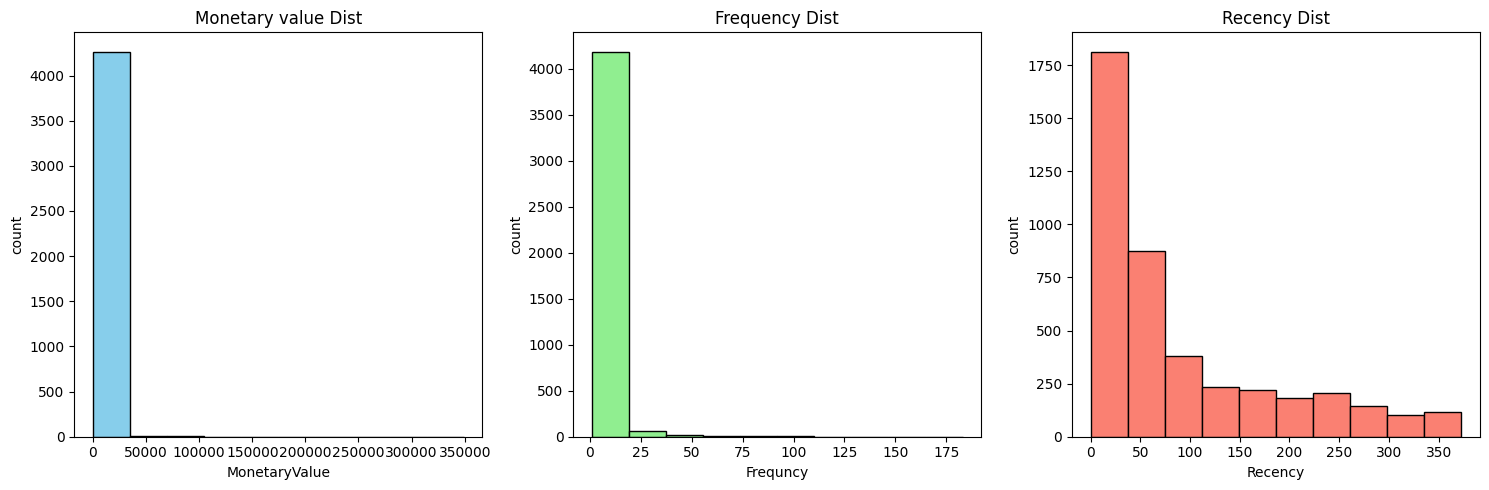

In [76]:
# plot histogram
plt.figure(figsize=(15, 5))
# monetary value
plt.subplot(1, 3, 1)
plt.hist(aggregated_data["MonetaryValue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary value Dist")
plt.xlabel("MonetaryValue")
plt.ylabel("count")
# Frequency
plt.subplot(1, 3, 2)
plt.hist(aggregated_data["Frequency"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency Dist")
plt.xlabel("Frequncy")
plt.ylabel("count")
# recency
plt.subplot(1, 3, 3)
plt.hist(aggregated_data["Recency"], bins=10, color="salmon", edgecolor="black")
plt.title("Recency Dist")
plt.xlabel("Recency")
plt.ylabel("count")

plt.tight_layout()
plt.show()

> * Monetary value is heavily right-skewed. You have several extreme values that pull the tail out.
> * Frequency is also right-skewed with clear outliers at the high end.
> * Recency looks smoother than the other two. Still right-skewed but without extreme spikes.

There is a need to investigate this data more and detect outliers using box plots

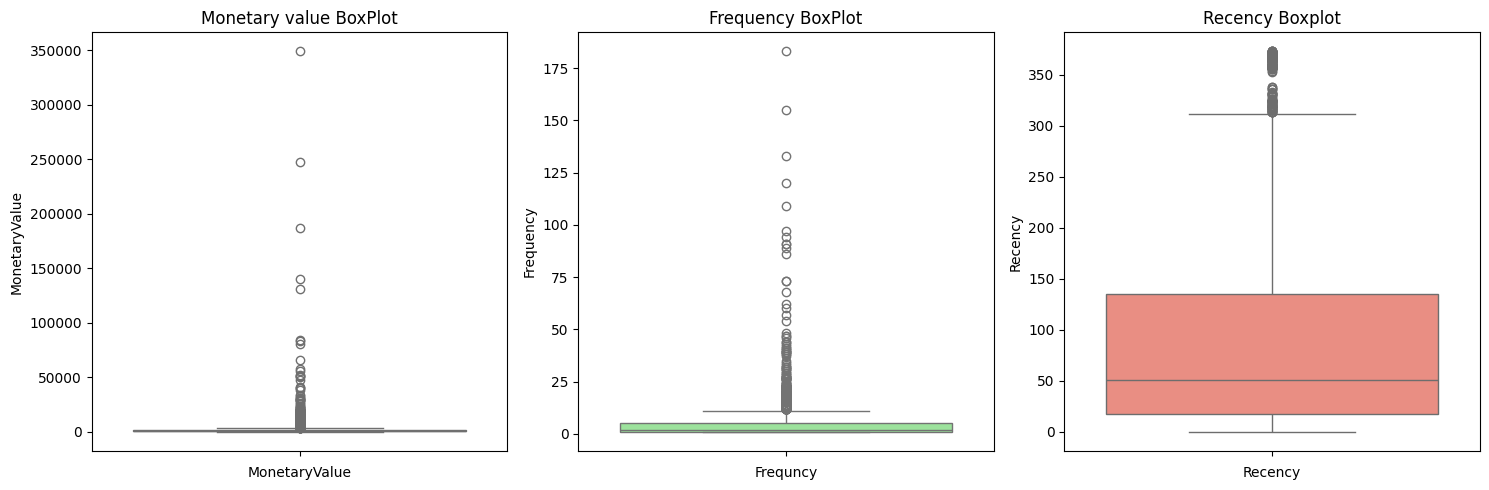

In [77]:
# plot histogram
plt.figure(figsize=(15, 5))

# monetary value
plt.subplot(1, 3, 1)
sns.boxplot(data = aggregated_data["MonetaryValue"], color="skyblue")
plt.title("Monetary value BoxPlot")
plt.xlabel("MonetaryValue")

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(data = aggregated_data["Frequency"], color="lightgreen")
plt.title("Frequency BoxPlot")
plt.xlabel("Frequncy")

# recency
plt.subplot(1, 3, 3)
sns.boxplot(data = aggregated_data["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

> * Monetary value is heavily right-skewed with many high outliers far above the main cluster.
> * Frequency also shows a right-skewed pattern with several customers purchasing far more often than the rest.
> * Recency has a wider spread, with a few long-recency outliers but a more stable distribution than the other two.

> High-value customers considered as outliers were identified, this will lead to performing separate clustering analyses on two distinct customer groups. This tiered approach recognizes that ultra-high-spending customers exhibit fundamentally different purchasing patterns that require separate segmentation from the general customer base. By analyzing these groups independently, we can develop targeted strategies for VIP retention and regular customer growth. We will seperate the vip customers from regular customers

In [78]:
# seperating outliers for monetary value
mv_Q1 = aggregated_data["MonetaryValue"].quantile(0.25)
mv_Q3 = aggregated_data["MonetaryValue"].quantile(0.75)
# get the IQR
mv_IQR = mv_Q3 - mv_Q1
# seperating outliers
mv_outlier_data = aggregated_data[(aggregated_data["MonetaryValue"] > (mv_Q3 + 1.5 * mv_IQR))| (aggregated_data["MonetaryValue"] < (mv_Q1 - 1.5 * mv_IQR))].copy()
# preview
mv_outlier_data.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,423.00,423.00,423.00,423,423.00
mean,15103.04,12188.10,17.17,2010-11-09 12:26:02.978723328,30.04
min,12357.00,3802.04,1.00,2009-12-10 18:03:00,0.00
25%,13622.00,4605.94,8.00,2010-11-08 13:17:30,3.00
50%,14961.00,6191.32,12.00,2010-11-26 12:19:00,13.00
75%,16692.00,10273.24,18.00,2010-12-06 10:34:30,31.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1728.66,25830.85,19.73,NaN,51.54


In [79]:
# seperating outliers for Frequency value
fq_Q1 = aggregated_data["Frequency"].quantile(0.25)
fq_Q3 = aggregated_data["Frequency"].quantile(0.75)
# get the IQR
fq_IQR = fq_Q3 - fq_Q1
# seperating outliers
fq_outlier_data = aggregated_data[(aggregated_data["Frequency"] > (fq_Q3 + 1.5 * fq_IQR))| (aggregated_data["Frequency"] < (fq_Q1 - 1.5 * fq_IQR))].copy()
# preview
fq_outlier_data.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,279.00,279.00,279.00,279,279.00
mean,15352.66,14409.71,23.81,2010-11-23 11:06:20.645161216,16.09
min,12437.00,1094.39,12.00,2010-05-12 16:51:00,0.00
25%,13800.00,4331.56,13.00,2010-11-20 13:14:30,2.00
50%,15465.00,6615.77,17.00,2010-12-02 10:46:00,7.00
75%,16828.50,11692.41,23.00,2010-12-07 11:08:30,19.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,211.00
std,1748.43,31381.74,21.93,NaN,26.59


In [80]:
# seperating the data where data in frequency and monetary value will be excluded
non_outlier_data = aggregated_data[(~aggregated_data.index.isin(mv_outlier_data.index)) & (~aggregated_data.index.isin(fq_outlier_data.index))]
# preview
non_outlier_data.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,3809.00,3809.00,3809.00,3809,3809.00
mean,15376.48,885.50,2.86,2010-09-03 11:16:46.516146176,97.08
min,12346.00,1.55,1.00,2009-12-01 10:49:00,0.00
25%,13912.00,279.91,1.00,2010-07-08 14:48:00,22.00
50%,15389.00,588.05,2.00,2010-10-12 16:25:00,58.00
75%,16854.00,1269.05,4.00,2010-11-17 13:14:00,154.00
max,18287.00,3788.21,11.00,2010-12-09 20:01:00,373.00
std,1693.20,817.67,2.24,NaN,98.11


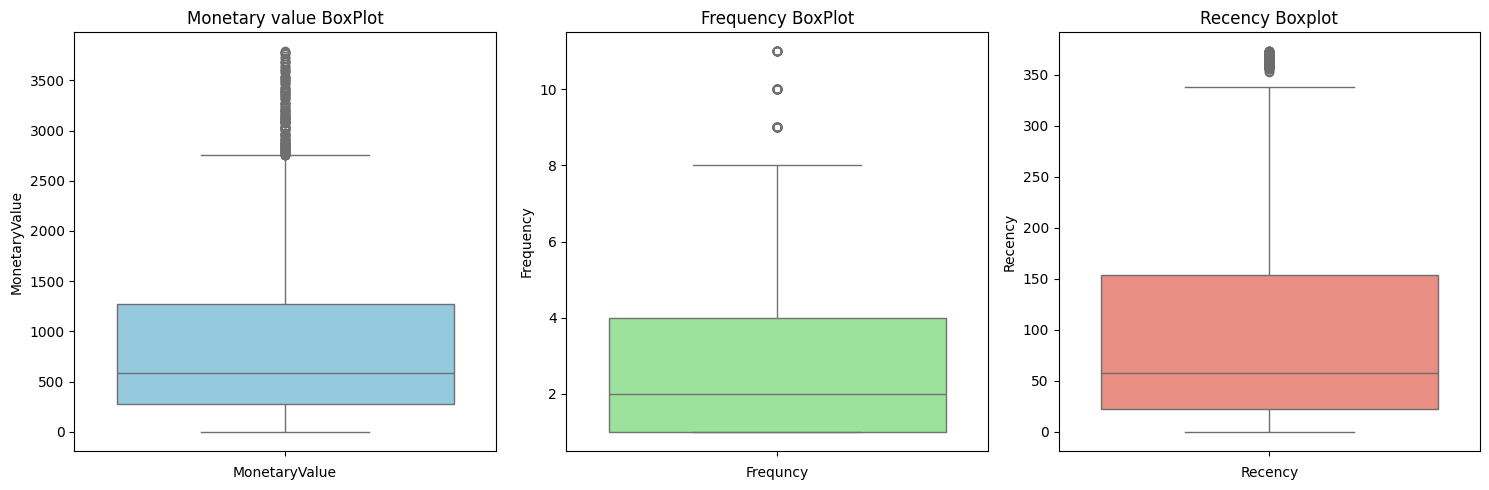

In [81]:
# plot histogram
plt.figure(figsize=(15, 5))

# monetary value
plt.subplot(1, 3, 1)
sns.boxplot(data = non_outlier_data["MonetaryValue"], color="skyblue")
plt.title("Monetary value BoxPlot")
plt.xlabel("MonetaryValue")

# Frequency
plt.subplot(1, 3, 2)
sns.boxplot(data = non_outlier_data["Frequency"], color="lightgreen")
plt.title("Frequency BoxPlot")
plt.xlabel("Frequncy")

# recency
plt.subplot(1, 3, 3)
sns.boxplot(data = non_outlier_data["Recency"], color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")

plt.tight_layout()
plt.show()

> Standardizing the data to use a common scale

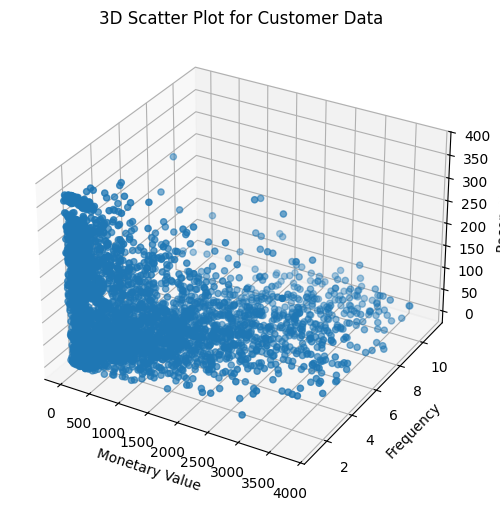

In [82]:
# ploting a 3d scatter pot
fig = plt.figure(figsize=(6,6))
# creating new axis
ax = fig.add_subplot(projection="3d")
# plot scatter
scatter = ax.scatter(non_outlier_data["MonetaryValue"], non_outlier_data["Frequency"], non_outlier_data["Recency"])
# title
ax.set_title("3D Scatter Plot for Customer Data")
# Set labels
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

plt.show()

In [83]:
# transform the scale to be standarduzed across all variables
scaler = StandardScaler()
# fit transform
scaled_df = scaler.fit_transform(non_outlier_data[["MonetaryValue", "Frequency", "Recency"]])
# preview
scaled_df

array([[-0.87594534, -0.38488934,  0.68214853],
       [ 0.53551441, -0.38488934, -0.96925093],
       [-0.81258645, -0.83063076, -0.24548944],
       ...,
       [-0.62197163, -0.83063076,  2.01753946],
       [ 0.44146683, -0.38488934,  0.14187587],
       [ 1.72488782,  0.50659348, -0.81634357]], shape=(3809, 3))

In [84]:
# convert scaled numpy array to dataframe
scaled_data = pd.DataFrame(scaled_df, index=non_outlier_data.index, columns=("MonetaryValue", "Frequency", "Recency"))
# preview
scaled_data.head()

,MonetaryValue,Frequency,Recency
0,-0.88,-0.38,0.68
1,0.54,-0.38,-0.97
2,-0.81,-0.83,-0.25
3,1.63,-0.38,-0.56
4,-0.72,-0.83,-0.89


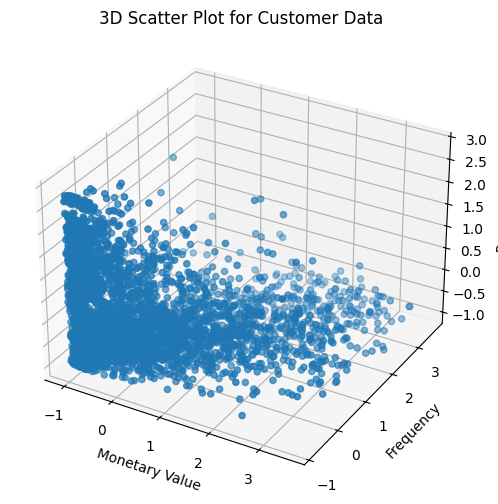

In [85]:
# ploting a 3d scatter pot
fig = plt.figure(figsize=(6,6))
# creating new axis
ax = fig.add_subplot(projection="3d")
# plot scatter
scatter = ax.scatter(scaled_data["MonetaryValue"], scaled_data["Frequency"], scaled_data["Recency"])
# title
ax.set_title("3D Scatter Plot for Customer Data")
# Set labels
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

plt.show()

### **4.0 Modelling**

#### **4.1 Kmeans clustering for Non_outliers data**

> Finding K using the Elbow method

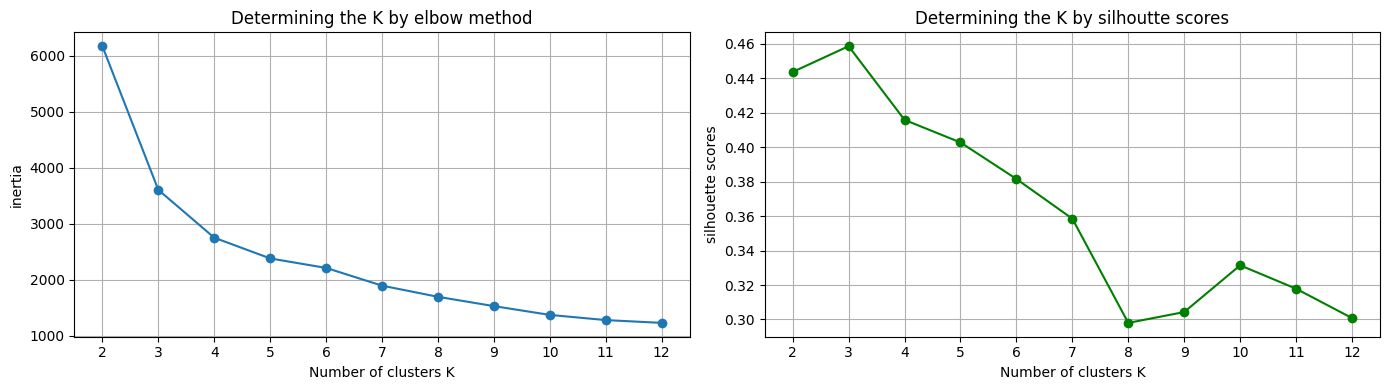

In [86]:
# set the maximum k
max_k = 12
# creatinga  new list to store k
inertia = []
silht_score = []
k_values = range(2, max_k + 1)
# loop through the k values
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter = 1000)
    # predict
    cluster_lables = kmeans.fit_predict(scaled_data)
    sil_score = silhouette_score(scaled_data, cluster_lables)
    silht_score.append(sil_score)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14,4))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker="o")
plt.title("Determining the K by elbow method")
plt.xlabel("Number of clusters K")
plt.ylabel("inertia")
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silht_score, marker="o", color="green")
plt.title("Determining the K by silhoutte scores")
plt.xlabel("Number of clusters K")
plt.ylabel("silhouette scores")
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

> The elbow method analysis indicates potential optimal cluster counts at k=4 and k=5,as both represent points of diminishing returns in inertia reduction. To resolve this ambiguity and select the most appropriatenumber of clusters, I conduct further validation using silhouette score analysis. The scores showed that K=4 is better than 5

In [87]:
# view cluster labels
kmeans = KMeans(n_clusters=4, random_state=42, max_iter=1000)
cluster_lables = kmeans.fit_predict(scaled_data)
# preview
cluster_lables

array([1, 0, 2, ..., 1, 0, 0], shape=(3809,), dtype=int32)

In [88]:
# Adding the cluster_lables to the non_outlier_data
non_outlier_data["Cluster"] = cluster_lables
# preview
non_outlier_data.iloc[1010:1020]

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
1153,14009.00,404.30,1,2010-09-03 12:08:00,97,2
1154,14010.00,445.15,2,2010-05-23 13:00:00,200,1
1155,14011.00,457.82,2,2010-08-16 15:31:00,115,2
1156,14013.00,611.55,2,2010-11-24 16:16:00,15,2
1157,14014.00,1443.03,2,2010-11-28 14:56:00,11,0
1159,14017.00,229.75,1,2010-05-17 14:52:00,206,1
1160,14018.00,367.15,1,2010-03-04 14:23:00,280,1
1161,14020.00,606.21,2,2010-08-20 13:09:00,111,2
1162,14021.00,1084.68,4,2010-11-30 15:14:00,9,0
1163,14022.00,352.15,1,2010-08-10 09:38:00,121,2


> Viewing the clusters scatter plot in 3D

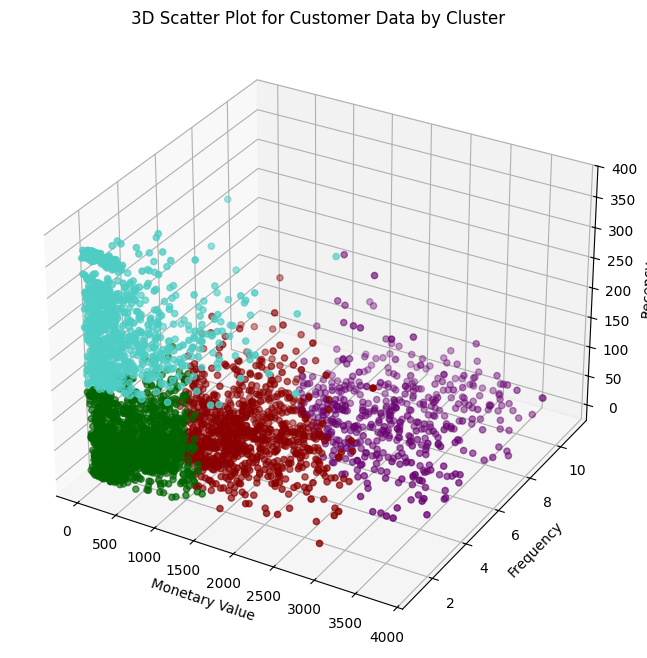

In [89]:
# define the colours
cluster_colors = {0: "#8B0000",
                  1: "#4ECDC4",
                  2: "#006400",
                  3: "#6A0572"}
colors = non_outlier_data["Cluster"].map(cluster_colors)

# ploting a 3d scatter pot
fig = plt.figure(figsize=(8,8))
# creating new axis
ax = fig.add_subplot(projection="3d")
# plot scatter
scatter = ax.scatter(non_outlier_data["MonetaryValue"], 
                     non_outlier_data["Frequency"], 
                     non_outlier_data["Recency"],
                     c=colors,
                     marker="o"
                     )
# title
ax.set_title("3D Scatter Plot for Customer Data by Cluster")
# Set labels
ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

plt.show()

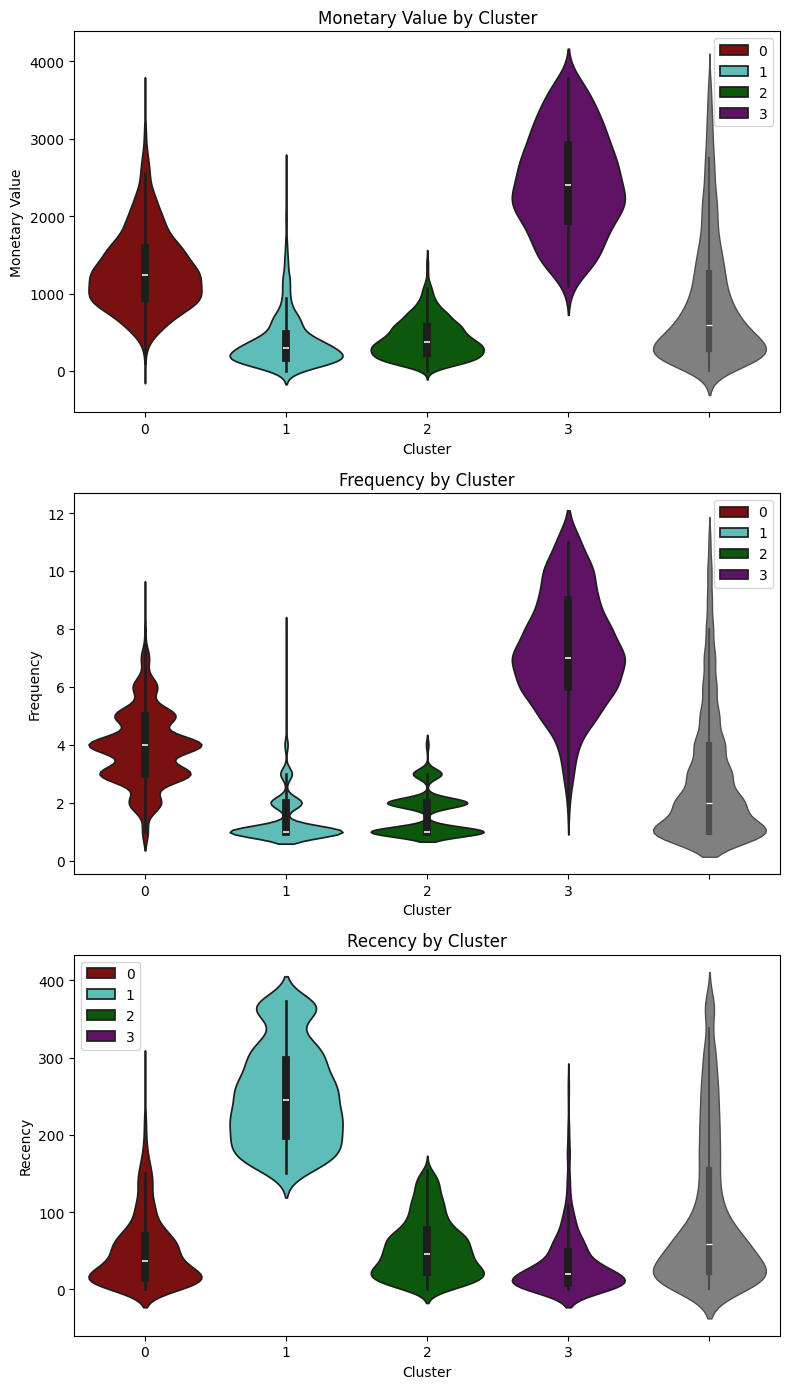

In [90]:
# check distribution across the clustsers using violin plot
plt.figure(figsize=(8, 14))

# monetary value
# add subplots
plt.subplot(3, 1, 1)
# plot
sns.violinplot(x = non_outlier_data["Cluster"], y = non_outlier_data["MonetaryValue"], palette = cluster_colors, hue = non_outlier_data["Cluster"])
sns.violinplot(y = non_outlier_data["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

# frequency
# add subplots
plt.subplot(3, 1, 2)
# plot
sns.violinplot(x = non_outlier_data["Cluster"], y = non_outlier_data["Frequency"], palette = cluster_colors, hue = non_outlier_data["Cluster"])
sns.violinplot(y = non_outlier_data["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

# recency
# add subplots
plt.subplot(3, 1, 3)
# plot
sns.violinplot(x = non_outlier_data["Cluster"], y = non_outlier_data["Recency"], palette = cluster_colors, hue = non_outlier_data["Cluster"])
sns.violinplot(y = non_outlier_data["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

#### **Cluster Interpretation**
> * **Cluster 3** represents the strongest customers. They spend the most, buy the most often, and their recency is low, which means they purchased recently. This group shows clear ongoing engagement and drives a large share of value.This are **premium** customers
**Action: These customers need to be engaged via Offering early access, loyalty rewards, or personalised bundles. Encourage repeat spend with targeted cross-sell offers.**
> * **Cluster 0** shows steady behaviour. Their spending and frequency sit in the middle range, and their recency is also low. They remain active and reliable, even if they aren’t top spenders.They are **regular** customers
**Action: Grow their value by Sending small incentives, product reminders, or curated recommendations. Nudge them toward higher frequency with limited-time deals.**
> * **Cluster 2** consists of occasional buyers. They spend less and purchase infrequently, with recency values that fall in the low-to-mid range. They engage from time to time but not enough to be considered strong contributors. They are **Occassional** customers
**Action: The customers need to be re-engaged via using simple reminders, light discounts, or seasonal campaigns. Show products based on their past purchases to spark another visit.**
> * **Cluster 1** includes the least active customers. Their spending and frequency are low, and their recency is very high, which indicates a long period since the last purchase. This group is at risk of churn or already inactive.They seem to have churned or **lapsed** customers**
**Action: A win-back plan is need e.g by Send a clear “we miss you” message with a strong offers *. If they don’t respond, move them to a low-cost marketing list to avoid unnecessary spend.**

> * **Cluster 3: Premium**
> * **Cluster 0: Regular**
> * **Cluster 2: Occassional**
> * **Cluster 1: Lapsed**

#### **4.2 Kmeans clustering  for outliers data**

In [91]:
# overlapping indices
overlap = mv_outlier_data.index.intersection(fq_outlier_data.index)
overlap

Index([  65,   84,   85,   92,  126,  145,  164,  179,  202,  203,
       ...
       4107, 4125, 4143, 4156, 4200, 4235, 4236, 4237, 4241, 4262],
      dtype='int64', length=226)

In [92]:
"""
We found outliers in both monetary value and frequency. Some customers appeared in both 
groups, so we needed to separate those overlapping records of length 226. After splitting the overlap 
from each group, we add the clusters labels manually and then we combine the dataset to have outliers clusters.
"""
monetary_outliers = mv_outlier_data.drop(overlap)
frequency_outliers = fq_outlier_data.drop(overlap)
mon_and_fre_outliers = mv_outlier_data.loc[overlap]
# manually offering clusters
monetary_outliers["Cluster"] = "A"
frequency_outliers["Cluster"] = "B"
mon_and_fre_outliers["Cluster"] = "C"
# combine the datasets
outlier_clusters_data = pd.concat([monetary_outliers, frequency_outliers, mon_and_fre_outliers])
# preview
outlier_clusters_data

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,A
25,12380.00,4782.84,4,2010-08-31 14:54:00,100,A
42,12409.00,12346.62,4,2010-10-15 10:24:00,55,A
48,12415.00,19468.84,4,2010-11-29 15:07:00,10,A
61,12431.00,4145.52,11,2010-12-01 10:03:00,8,A
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,C
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,C
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,C
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,C


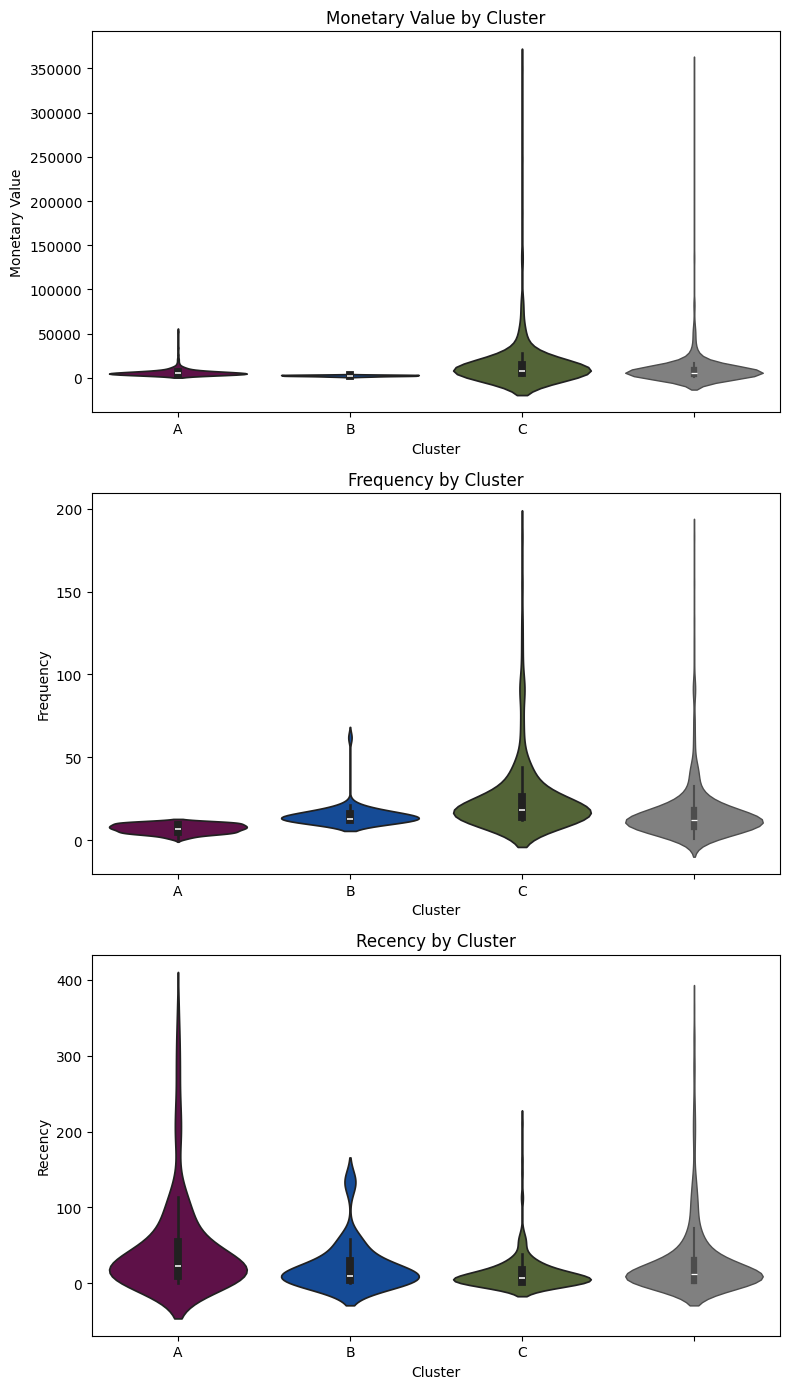

In [93]:
# define the colours
cluster_colors = {"A": "#6B044E",
                  "B": "#0047AB",
                  "C": "#556B2F"}
# check distribution across the clustsers using violin plot
plt.figure(figsize=(8, 14))

# monetary value
# add subplots
plt.subplot(3, 1, 1)
# plot
sns.violinplot(x = outlier_clusters_data["Cluster"], y = outlier_clusters_data["MonetaryValue"], palette = cluster_colors, hue = outlier_clusters_data["Cluster"])
sns.violinplot(y = outlier_clusters_data["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")

# frequency
# add subplots
plt.subplot(3, 1, 2)
# plot
sns.violinplot(x = outlier_clusters_data["Cluster"], y = outlier_clusters_data["Frequency"], palette = cluster_colors, hue = outlier_clusters_data["Cluster"])
sns.violinplot(y = outlier_clusters_data["Frequency"], color="gray", linewidth=1.0)
plt.title("Frequency by Cluster")
plt.ylabel("Frequency")

# recency
# add subplots
plt.subplot(3, 1, 3)
# plot
sns.violinplot(x = outlier_clusters_data["Cluster"], y = outlier_clusters_data["Recency"], palette = cluster_colors, hue = outlier_clusters_data["Cluster"])
sns.violinplot(y = outlier_clusters_data["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")

plt.tight_layout()
plt.show()

#### **Cluster Interpretation**

> * **Cluster A** contains customers with extremely high monetary value but low frequency. They spend large amounts in one or very few purchases. Their recency varies widely, meaning some returned recently, and others haven’t purchased for a long time. **Action: These customers are needed to return more often by Offering personalised invitations, exclusive previews, or reminders about new stock and a small incentive can encourage a repeat purchase.**
> * **Cluster B** includes customers with high frequency but moderate monetary value. These are repeat buyers who come often but don't spend very large amounts per visit. Their recency is also moderate, suggesting they are active but not in the top tier. **Action: Introduce loyalty programs, volume discounts, or bundles that Show them slightly higher-end items based on their browsing or purchase history to grow their intrest and value** 
> * **Cluster C** represents customers who are outliers in both monetary value and frequency. They buy often and also spend a lot. Their recency distribution is low for many, meaning they are still active, but some have gaps. This is the strongest group and includes the top 226 overlapping outliers. **Action: This group should be protected by Provide priority service, early access to products, and personalised communication. Avoid over-contacting them, but give them meaningful rewards to maintain their loyalty.**

> * **Cluster C: Elite**
> * **Cluster B: Power_Shopper**
> * **Cluster A: High_Spender**

In [94]:
# combine our dataset to orginal
final_clustered_data = pd.concat([non_outlier_data, outlier_clusters_data])
final_clustered_data

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2
...,...,...,...,...,...,...
4235,18223.00,7516.31,12,2010-11-17 12:20:00,22,C
4236,18225.00,7545.14,15,2010-12-09 15:46:00,0,C
4237,18226.00,6650.83,15,2010-11-26 15:51:00,13,C
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,C


In [95]:
# assigning names of the cluster to the data
cluster_names = {
    0: "Regular",
    1: "Lapsed",
    2: "Occassional",
    3: "Premium",
    "A": "High_Spender",
    "B": "Power_Shopper",
    "C": "Elite"
}
# integrate
final_clustered_data["ClusterNames"] = final_clustered_data["Cluster"].map(cluster_names)
# preview
final_clustered_data.head()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster,ClusterNames
0,12346.00,169.36,2,2010-06-28 13:53:00,164,1,Lapsed
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,Regular
2,12348.00,221.16,1,2010-09-27 14:59:00,73,2,Occassional
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,0,Regular
4,12351.00,300.93,1,2010-11-29 15:23:00,10,2,Occassional


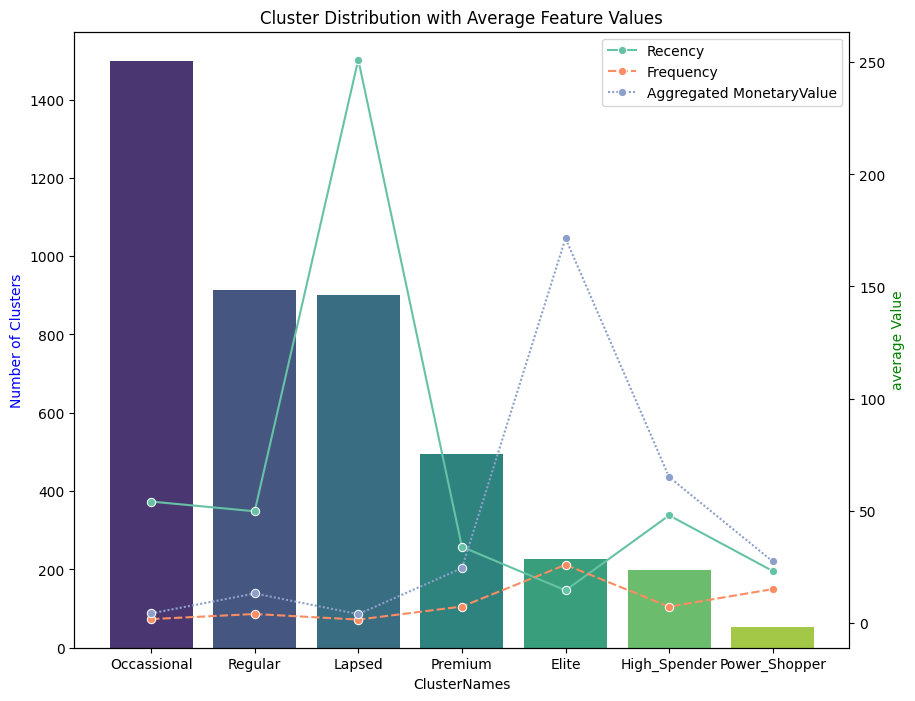

In [96]:
cluster_counts = final_clustered_data["ClusterNames"].value_counts()
# Divide monetary value with 100 pounds to standardize the scale
final_clustered_data["Aggregated MonetaryValue"] = final_clustered_data["MonetaryValue"]/100
feature_names = final_clustered_data.groupby('ClusterNames')[['Recency', 'Frequency', 'Aggregated MonetaryValue']].mean()
fig, ax1 = plt.subplots(figsize=(10, 8))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Clusters', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_names, ax=ax2, palette='Set2', markers='o')
ax2.set_ylabel('average Value', color='g')

plt.show()

> * **Occasional** - This cluster has the biggest group with high recency, which means these customers haven’t bought anything for a long time. Their frequency and monetary value stay low. They shop once in a while, spend little, and don’t show much activity.
> * **Regular** - This cluster shows steady behaviour where Customers buy more often than the Occasional group and return at reasonable intervals. Their spend level is modest but predictable and they form a reliable base without driving high revenue.
> * **Lapsed** - This cluster represents customers who have gone quiet with high recency which explains that they stopped buying a long time ago, They show that their past frequency and spending was low meaning they are inactive and would need strong re-engagement efforts.
> * **Premium** - This cluster sits in the middle where customers buy more consistently, showing better recency, and spend at a moderate level, they have healthier activity patterns and respond well to targeted offers.
> * **Elite** - This cluster is your strongest revenue source where customers spend the most, buying often, and return more recently. Their behaviour shows loyalty and high value that should be prioritised for retention.
> * **High_Spender** - This cluster contains customers who spend a lot per visit where their frequency is good, and their recency shows they stay engaged. They contribute strongly even if they buy less often than the Power_Shopper group.
> * **Power_Shopper** - This cluster is small but active. These customers buy often and recently. Their spend per transaction is not as high as Elite or High_Spender, but their activity makes them valuable. They respond well to promotions and new product releases.

In [98]:
import joblib

joblib.dump(scaler, "scaler.pkl")
joblib.dump(kmeans, "kmeans.pkl")


['kmeans.pkl']

In [99]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']